In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

In [18]:
%matplotlib inline

In [5]:
data=pd.read_csv('cluster.csv')

In [6]:
len(data)

468219

In [1]:
data0=preprocessing.scale(data[['SW','phie','GR','ILD','RHOB']])
data1=preprocessing.scale(data[['SW','phie']])

NameError: name 'preprocessing' is not defined

In [4]:
gmm0 = GaussianMixture(n_components=4)
gmm0.fit(data0)
gmm1 = GaussianMixture(n_components=4)
gmm1.fit(data1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
data['GMM_cluster'] = gmm.predict(data[['xp','yp']])

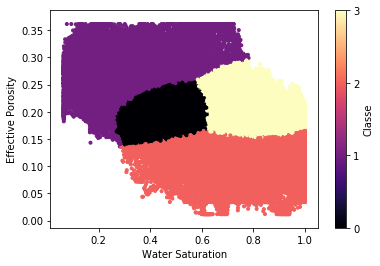

In [47]:
plt.scatter(x,y,c=data['GMM_cluster'],cmap='magma',marker=".")
plt.colorbar(ticks=[0,1,2,3],label='Classe')
plt.xlabel('Water Saturation')
plt.ylabel('Effective Porosity')
plt.show()

Text(0.5, 0, 'J célula - Inlines')

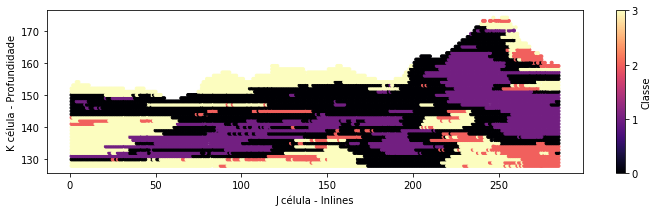

In [45]:
j_slice=int((np.max(data['j']))/2)
j_slice_data=data.loc[data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['GMM_cluster'],cmap='magma',marker=".")
plt.colorbar(ticks=[0,1,2,3],label='Classe')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

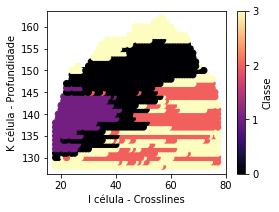

In [46]:
i_slice=int((np.max(data['i']))/2)
i_slice_data=data.loc[data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['GMM_cluster'],cmap='magma',marker="o")
plt.colorbar(ticks=[0,1,2,3],label='Classe')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

Text(0.5, 0, 'Longitude')

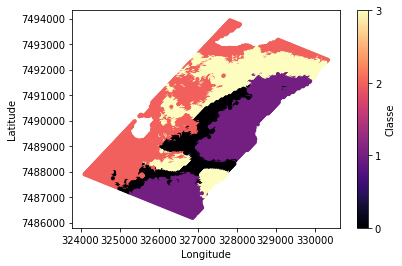

In [48]:
k_slice=int((np.median(data['k']))/1)
k_slice_data=data.loc[data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['GMM_cluster'],cmap='magma',marker=".")
plt.colorbar(ticks=[0,1,2,3],label='Classe')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [39]:
probs = gmm.predict_proba(data[['xp','yp']])

In [70]:
prob_1=[]
for i in probs:
    prob_1.append(i[1])

Text(0, 0.5, 'Effective Porosity')

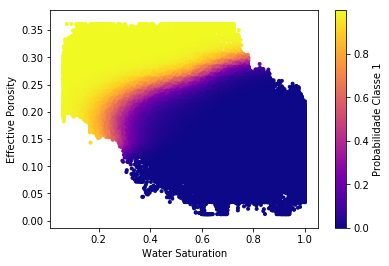

In [71]:
plt.scatter(x,y,c=prob_1,cmap='plasma',marker=".")
plt.colorbar(label='Probabilidade Classe 1')
plt.xlabel('Water Saturation')
plt.ylabel('Effective Porosity')

In [72]:
data['GMM prob 1'] = pd.Series(prob_1)

Text(0.5, 0, 'J célula - Inlines')

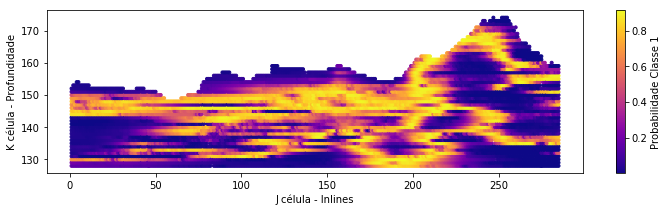

In [73]:
j_slice=int((np.max(data['j']))/2)
j_slice_data=data.loc[data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['GMM prob 0'],cmap='plasma',marker=".")
plt.colorbar(label="Probabilidade Classe 1")
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

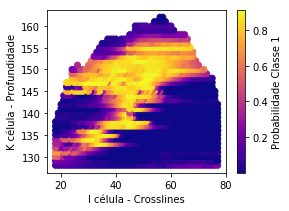

In [74]:
i_slice=int((np.max(data['i']))/2)
i_slice_data=data.loc[data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['GMM prob 0'],cmap='plasma',marker="o")
plt.colorbar(label='Probabilidade Classe 1')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

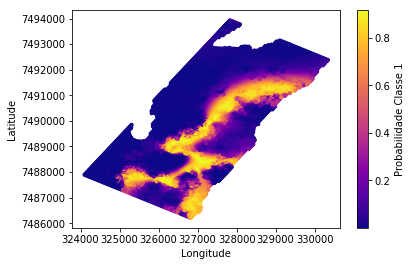

In [75]:
k_slice=int((np.mean(data['k']))/1)
k_slice_data=data.loc[data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['GMM prob 0'],cmap='plasma',marker=".")
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.colorbar(label='Probabilidade Classe 1')

In [79]:
data.to_csv('gmm.csv')